In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from time import time
from skimage import io
from matplotlib import pyplot as plt
import cv2
import datetime

In [2]:
def getAllFilesInDirectory(directoryPath: str):
    return[(directoryPath + "/" +f) for f in listdir(directoryPath) if isfile(join(directoryPath, f))]

def getAllInDirectory(directoryPath: str):
    return[(directoryPath + "/" +f) for f in listdir(directoryPath)]

## Data preparation

In [11]:
#get image/video names pour train

start_time = time()

dic_names_train = {} #{'name':[name_drone, hour, extension]}

path = "data/Train-Set"
for folder in getAllInDirectory(path):
    if "Labels" not in str(folder):
        for folder2 in getAllInDirectory(folder):
            for folder3 in getAllInDirectory(folder2):
                if "Extracted-Frames-1280x720" not in folder3:
                    name_drone = folder3.split("/")[-3]
                    hour = folder3.split("/")[-2]
                    extension = "."+folder3.split(".")[-1]
                    name = folder3.split("/")[-1].rsplit(extension)[0]
                    dic_names_train[name] = [name_drone, hour, extension]
                    
print("Time :", time() - start_time, "secs")

Time : 0.0029990673065185547 secs


In [12]:
#train set

start_time = time()

list_video_name = []
list_video_path = []
list_image_name = []
list_image_path = []
list_track_id = []
list_xmin_3840_2160 = []
list_ymin_3840_2160 = []
list_xmax_3840_2160 = []
list_ymax_3840_2160 = []
list_xmin_1280_720 = []
list_ymin_1280_720 = []
list_xmax_1280_720 = []
list_ymax_1280_720 = []
list_frame = []
list_lost = []
list_occluded = []
list_generated = []
list_label = []

dic_df_train = {
    "video_name": list_video_name, "video_path": list_video_path, "image_name": list_image_name, "image_path": list_image_path, "track_id": list_track_id, "xmin_3840_2160": list_xmin_3840_2160, "ymin_3840_2160": list_ymin_3840_2160, "xmax_3840_2160": list_xmax_3840_2160, "ymax_3840_2160": list_ymax_3840_2160, "xmin_1280_720": list_xmin_1280_720, "ymin_1280_720": list_ymin_1280_720, "xmax_1280_720": list_xmax_1280_720, "ymax_1280_720": list_ymax_1280_720, "frame": list_frame, "lost": list_lost, "occluded": list_occluded, "generated": list_generated, "label": list_label
}

path = "data/Train-Set/Labels/MultiActionLabels/3840x2160"
#path = "data/Train-Set/Labels/SingleActionLabels/3840x2160"
#path = "data/Train-Set/Labels/SingleActionTrackingLabels/3840x2160"

for txt_path in getAllFilesInDirectory(path):
    print(txt_path)
    name = txt_path.split("/")[-1].split(".txt")[0]
    
    video_name = name + dic_names_train[name][2]
    video_path = "data/Train-Set/" + dic_names_train[name][0] + "/" + dic_names_train[name][1] + "/" + video_name
    
    df_temp = pd.read_csv(txt_path, delimiter=" ", usecols=range(0,10), header=None)
    for index, row in df_temp.iterrows():
        list_video_name.append(video_name)
        list_video_path.append(video_path)
        track_id = row[0]
        list_track_id.append(track_id)
        
        xmin_3840_2160 = row[1]
        list_xmin_3840_2160.append(xmin_3840_2160)
        ymin_3840_2160 = row[2]
        list_ymin_3840_2160.append(ymin_3840_2160)
        xmax_3840_2160 = row[3]
        list_xmax_3840_2160.append(xmax_3840_2160)
        ymax_3840_2160 = row[4]
        list_ymax_3840_2160.append(ymax_3840_2160)
        
        xmin_1280_720 = round(xmin_3840_2160 / 3)
        list_xmin_1280_720.append(xmin_1280_720)
        ymin_1280_720 = round(ymin_3840_2160 / 3)
        list_ymin_1280_720.append(ymin_1280_720)
        xmax_1280_720 = round(xmax_3840_2160 / 3)
        list_xmax_1280_720.append(xmax_1280_720)
        ymax_1280_720 = round(ymax_3840_2160 / 3)
        list_ymax_1280_720.append(ymax_1280_720)
        
        frame = row[5]
        list_frame.append(frame)
        lost = row[6]
        list_lost.append(lost)
        occluded = row[7]
        list_occluded.append(occluded)
        generated = row[8]
        list_generated.append(generated)
        label = row[9]
        list_label.append(label)
        image_name = str(frame) + ".jpg"
        list_image_name.append(image_name)
        image_path = "data/Train-Set" + "/" + dic_names_train[name][0] + "/" + dic_names_train[name][1] + "/Extracted-Frames-1280x720/"+ name + "/" + image_name
        list_image_path.append(image_path)
        
df_train = pd.DataFrame(dic_df_train)
print("Time :", time() - start_time, "secs")

df_train

data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.1.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.10.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.11.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.2.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.3.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.4.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.5.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.6.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.1.7.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.2.11.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.2.2.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.2.4.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.2.5.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.2.6.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.2.7.txt
data/Train-Set/Labels/MultiActionLabels/3840x2160/1.2.8.txt
data/Train-Set/Labels/MultiActionLabe

,video_name,video_path,image_name,image_path,track_id,xmin_3840_2160,ymin_3840_2160,xmax_3840_2160,ymax_3840_2160,xmin_1280_720,ymin_1280_720,xmax_1280_720,ymax_1280_720,frame,lost,occluded,generated,label
0,1.1.1.mov,data/Train-Set/Drone1/Morning/1.1.1.mov,0.jpg,data/Train-Set/Drone1/Morning/Extracted-Frames...,0,764,309,823,441,255,103,274,147,0,0,0,0,Person
1,1.1.1.mov,data/Train-Set/Drone1/Morning/1.1.1.mov,1.jpg,data/Train-Set/Drone1/Morning/Extracted-Frames...,0,761,309,820,438,254,103,273,146,1,0,0,1,Person
2,1.1.1.mov,data/Train-Set/Drone1/Morning/1.1.1.mov,2.jpg,data/Train-Set/Drone1/Morning/Extracted-Frames...,0,761,309,820,438,254,103,273,146,2,0,0,1,Person
3,1.1.1.mov,data/Train-Set/Drone1/Morning/1.1.1.mov,3.jpg,data/Train-Set/Drone1/Morning/Extracted-Frames...,0,761,309,820,438,254,103,273,146,3,0,0,1,Person
4,1.1.1.mov,data/Train-Set/Drone1/Morning/1.1.1.mov,4.jpg,data/Train-Set/Drone1/Morning/Extracted-Frames...,0,761,309,820,438,254,103,273,146,4,0,0,1,Person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422048,2.2.9.mp4,data/Train-Set/Drone2/Noon/2.2.9.mp4,1436.jpg,data/Train-Set/Drone2/Noon/Extracted-Frames-12...,63,2915,2052,3013,2153,972,684,1004,718,1436,1,0,1,Person
422049,2.2.9.mp4,data/Train-Set/Drone2/Noon/2.2.9.mp4,1437.jpg,data/Train-Set/Drone2/Noon/Extracted-Frames-12...,63,2915,2052,3013,2153,972,684,1004,718,1437,1,0,1,Person
422050,2.2.9.mp4,data/Train-Set/Drone2/Noon/2.2.9.mp4,1438.jpg,data/Train-Set/Drone2/Noon/Extracted-Frames-12...,63,2915,2052,3013,2153,972,684,1004,718,1438,1,0,1,Person
422051,2.2.9.mp4,data/Train-Set/Drone2/Noon/2.2.9.mp4,1439.jpg,data/Train-Set/Drone2/Noon/Extracted-Frames-12...,63,2915,2052,3013,2153,972,684,1004,718,1439,1,0,1,Person


(720, 1280, 3)


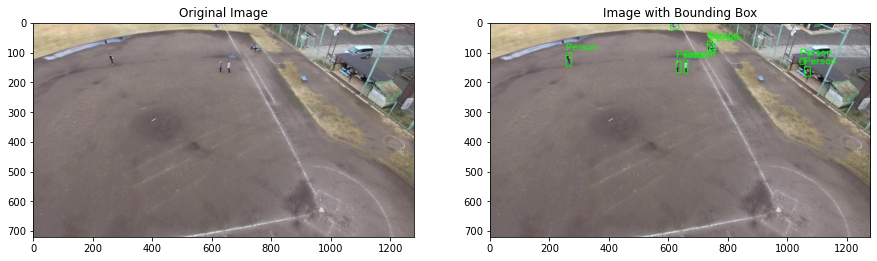

In [13]:
#vérification sur une image

img_path = "data/Train-Set/Drone1/Morning/Extracted-Frames-1280x720/1.1.1/0.jpg"
img = io.imread(img_path)

height, width, _ = img.shape
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
img_bbox = img.copy()
df_select = df_train[df_train['image_path'] == img_path]
for index, row in df_select.iterrows():
    xmin = row['xmin_1280_720']
    ymin = row['ymin_1280_720']
    xmax = row['xmax_1280_720']
    ymax = row['ymax_1280_720']
    
    label_name = row['label']
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox, label_name, (xmin,ymin-10), font, 1,(0,255,0),2)
    
plt.subplot(1,2,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)
plt.show()

In [14]:
#get image/video names pour test

start_time = time()

dic_names_test = {} #{'name':[name_drone, hour, extension]}

path = "data/Test-Set"
for folder in getAllInDirectory(path):
    if "Labels" not in str(folder):
        for folder2 in getAllInDirectory(folder):
            for folder3 in getAllInDirectory(folder2):
                if "Extracted-Frames-1280x720" not in folder3:
                    name_drone = folder3.split("/")[-3]
                    hour = folder3.split("/")[-2]
                    extension = "."+folder3.split(".")[-1]
                    name = folder3.split("/")[-1].rsplit(extension)[0]
                    dic_names_test[name] = [name_drone, hour, extension]
                    
print("Time :", time() - start_time, "secs")

Time : 0.04001307487487793 secs


In [15]:
#test set

start_time = time()

list_video_name = []
list_video_path = []
list_image_name = []
list_image_path = []
list_track_id = []
list_xmin_3840_2160 = []
list_ymin_3840_2160 = []
list_xmax_3840_2160 = []
list_ymax_3840_2160 = []
list_xmin_1280_720 = []
list_ymin_1280_720 = []
list_xmax_1280_720 = []
list_ymax_1280_720 = []
list_frame = []
list_lost = []
list_occluded = []
list_generated = []
list_label = []

dic_df_test = {
    "video_name": list_video_name, "video_path": list_video_path, "image_name": list_image_name, "image_path": list_image_path, "track_id": list_track_id, "xmin_3840_2160": list_xmin_3840_2160, "ymin_3840_2160": list_ymin_3840_2160, "xmax_3840_2160": list_xmax_3840_2160, "ymax_3840_2160": list_ymax_3840_2160, "xmin_1280_720": list_xmin_1280_720, "ymin_1280_720": list_ymin_1280_720, "xmax_1280_720": list_xmax_1280_720, "ymax_1280_720": list_ymax_1280_720, "frame": list_frame, "lost": list_lost, "occluded": list_occluded, "generated": list_generated, "label": list_label
}

path = "data/Test-Set/Labels/MultiActionLabels/3840x2160"

for txt_path in getAllFilesInDirectory(path):
    print(txt_path)
    name = txt_path.split("/")[-1].split(".txt")[0]
    
    video_name = name + dic_names_test[name][2]
    video_path = "data/Test-Set/" + dic_names_test[name][0] + "/" + dic_names_test[name][1] + "/" + video_name
    
    df_temp = pd.read_csv(txt_path, delimiter=" ", usecols=range(0,10), header=None)
    for index, row in df_temp.iterrows():
        list_video_name.append(video_name)
        list_video_path.append(video_path)
        track_id = row[0]
        list_track_id.append(track_id)
        
        xmin_3840_2160 = row[1]
        list_xmin_3840_2160.append(xmin_3840_2160)
        ymin_3840_2160 = row[2]
        list_ymin_3840_2160.append(ymin_3840_2160)
        xmax_3840_2160 = row[3]
        list_xmax_3840_2160.append(xmax_3840_2160)
        ymax_3840_2160 = row[4]
        list_ymax_3840_2160.append(ymax_3840_2160)
        
        xmin_1280_720 = round(xmin_3840_2160 / 3)
        list_xmin_1280_720.append(xmin_1280_720)
        ymin_1280_720 = round(ymin_3840_2160 / 3)
        list_ymin_1280_720.append(ymin_1280_720)
        xmax_1280_720 = round(xmax_3840_2160 / 3)
        list_xmax_1280_720.append(xmax_1280_720)
        ymax_1280_720 = round(ymax_3840_2160 / 3)
        list_ymax_1280_720.append(ymax_1280_720)
        
        frame = row[5]
        list_frame.append(frame)
        lost = row[6]
        list_lost.append(lost)
        occluded = row[7]
        list_occluded.append(occluded)
        generated = row[8]
        list_generated.append(generated)
        label = row[9]
        list_label.append(label)
        image_name = str(frame) + ".jpg"
        list_image_name.append(image_name)
        image_path = "data/Test-Set" + "/" + dic_names_test[name][0] + "/" + dic_names_test[name][1] + "/Extracted-Frames-1280x720/"+ name + "/" + image_name
        list_image_path.append(image_path)
        
df_test = pd.DataFrame(dic_df_test)
print("Time :", time() - start_time, "secs")

df_test

data/Test-Set/Labels/MultiActionLabels/3840x2160/1.1.8.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/1.1.9.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/1.2.1.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/1.2.10.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/1.2.3.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/2.1.8.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/2.1.9.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/2.2.1.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/2.2.10.txt
data/Test-Set/Labels/MultiActionLabels/3840x2160/2.2.3.txt
Time : 23.25213313102722 secs


,video_name,video_path,image_name,image_path,track_id,xmin_3840_2160,ymin_3840_2160,xmax_3840_2160,ymax_3840_2160,xmin_1280_720,ymin_1280_720,xmax_1280_720,ymax_1280_720,frame,lost,occluded,generated,label
0,1.1.8.mp4,data/Test-Set/Drone1/Morning/1.1.8.mp4,0.jpg,data/Test-Set/Drone1/Morning/Extracted-Frames-...,0,1475,109,1574,205,492,36,525,68,0,0,0,0,Person
1,1.1.8.mp4,data/Test-Set/Drone1/Morning/1.1.8.mp4,1.jpg,data/Test-Set/Drone1/Morning/Extracted-Frames-...,0,1473,115,1568,210,491,38,523,70,1,0,0,1,Person
2,1.1.8.mp4,data/Test-Set/Drone1/Morning/1.1.8.mp4,2.jpg,data/Test-Set/Drone1/Morning/Extracted-Frames-...,0,1473,123,1565,219,491,41,522,73,2,0,0,1,Person
3,1.1.8.mp4,data/Test-Set/Drone1/Morning/1.1.8.mp4,3.jpg,data/Test-Set/Drone1/Morning/Extracted-Frames-...,0,1470,132,1560,224,490,44,520,75,3,0,0,1,Person
4,1.1.8.mp4,data/Test-Set/Drone1/Morning/1.1.8.mp4,4.jpg,data/Test-Set/Drone1/Morning/Extracted-Frames-...,0,1470,137,1557,233,490,46,519,78,4,0,0,1,Person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102591,2.2.3.mp4,data/Test-Set/Drone2/Noon/2.2.3.mp4,1917.jpg,data/Test-Set/Drone2/Noon/Extracted-Frames-128...,31,1014,390,1183,497,338,130,394,166,1917,0,0,1,Person
102592,2.2.3.mp4,data/Test-Set/Drone2/Noon/2.2.3.mp4,1918.jpg,data/Test-Set/Drone2/Noon/Extracted-Frames-128...,31,983,382,1155,489,328,127,385,163,1918,0,0,1,Person
102593,2.2.3.mp4,data/Test-Set/Drone2/Noon/2.2.3.mp4,1919.jpg,data/Test-Set/Drone2/Noon/Extracted-Frames-128...,31,950,373,1124,480,317,124,375,160,1919,0,0,1,Person
102594,2.2.3.mp4,data/Test-Set/Drone2/Noon/2.2.3.mp4,1920.jpg,data/Test-Set/Drone2/Noon/Extracted-Frames-128...,31,919,368,1096,475,306,123,365,158,1920,0,0,0,Person


## YoloV3 (tiny)

### Création du fichier de train

In [11]:
#format : img x_min,y_min,x_max,y_max,class_id x_min,y_min,x_max,y_max,class_id x_min,y_min,x_max,y_max,class_id ...
    #path/to/img1.jpg 50,100,150,200,0 30,50,200,120,3
    #path/to/img2.jpg 120,300,250,600,2
    
list_done = []

df_train_yolov3 = df_train[["image_path", "xmin_1280_720", "ymin_1280_720", "xmax_1280_720", "ymax_1280_720", "label"]]

yolo_format = ""

i = 0

nb_frame_to_skeep = 7 #1 3 5 10 #on ne garde qu'une frame sur X

for index, row in df_train_yolov3.iterrows():
    
    image_path = row[0]
    if (image_path not in list_done) and (i%nb_frame_to_skeep== 0):
        results = np.array(df_train_yolov3[df_train_yolov3.image_path == image_path])
        
        is_first = True
        for res in results:
            xmin = res[1]
            ymin = res[2]
            xmax = res[3]
            ymax = res[4]
            label = res[5]
            
            if is_first :
                yolo_format += image_path
                #list_done.append(image_path)
                is_first = False
            
            yolo_format += " " + str(xmin) + "," + str(ymin) + "," + str(xmax) + "," + str(ymax) + "," + str(0) #class_id 0 = label person
            
        yolo_format += "\n"
    list_done.append(image_path)
    i+=1
    
text_file = open("txt_train_yolo_del_frames_"+str(nb_frame_to_skeep)+".txt", "w")
text_file.write(yolo_format)
text_file.close()

### Création du fichier de validation

In [49]:
#validation

list_done = []

df_test_yolov3 = df_test[["image_path", "xmin_1280_720", "ymin_1280_720", "xmax_1280_720", "ymax_1280_720", "label"]]

yolo_format = ""

i = 0

nb_frame_to_skeep = 3 #1 3 5 10 #on ne garde qu'une frame sur X

for index, row in df_test_yolov3.iterrows():
    
    image_path = row[0]
    if (image_path not in list_done) and (i%nb_frame_to_skeep== 0):
        results = np.array(df_test_yolov3[df_test_yolov3.image_path == image_path])
        
        is_first = True
        for res in results:
            xmin = res[1]
            ymin = res[2]
            xmax = res[3]
            ymax = res[4]
            label = res[5]
            
            if is_first :
                yolo_format += "../" + image_path
                #list_done.append(image_path)
                is_first = False
            
            yolo_format += " " + str(xmin) + "," + str(ymin) + "," + str(xmax) + "," + str(ymax) + "," + str(0) #class_id 0 = label person
            
        yolo_format += "\n"
    list_done.append(image_path)
    i+=1
    
text_file = open("txt_valid/txt_valid_yolo_del_frames_"+str(nb_frame_to_skeep)+".txt", "w")
text_file.write(yolo_format)
text_file.close()

In [ ]:
# model.py : K.control_flow_ops.while_loop -> tf.while_loop

### Training

In [3]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

Using TensorFlow backend.


In [4]:
def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo_weights.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)  #data augmentation
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

In [9]:
model_name = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")

tensorboard_callback = TensorBoard(log_dir='./tb_logs/' + model_name, write_graph=False) #write_graph=True, write_images=True
#tensorboard --logdir="./tb_logs/" --host localhost --port 6006

log_dir = 'checkpoints/'
checkpoint = ModelCheckpoint(log_dir + model_name + '_ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                             monitor='val_loss', save_best_only=True, period=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)

early_stopping_2_l = EarlyStopping(monitor='val_loss', min_delta=0, patience=6, verbose=1, restore_best_weights=True)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=12, verbose=1, restore_best_weights=True)

In [10]:
annotation_path = 'txt_train/txt_train_yolo.txt'  #'txt_train/txt_train_yolo_del_frames_5.txt'

classes_path = 'model_data/tp_classes.txt'
anchors_path = 'model_data/tiny_yolo_anchors.txt'  #'model_data/yolo_anchors.txt'

class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)

input_shape = (416,416) # multiple of 32, hw


is_tiny_version = len(anchors)==6 # default setting
if is_tiny_version:
    print("Use tiny yolo")
    model = create_tiny_model(input_shape, anchors, num_classes,
        freeze_body=2, weights_path='checkpoints/2020-04-21_17-01_ep042-loss21.060-val_loss15.416.h5')  #'model_data/tiny_yolo_weights.h5'
else:
    print("Use yolo")
    model = create_model(input_shape, anchors, num_classes,
        freeze_body=2, weights_path='model_data/yolo_weights.h5') # make sure you know what you freeze

val_split = 0.2 #0.1

with open(annotation_path) as f:
    lines = f.readlines()
    
np.random.seed(0) #10101
np.random.shuffle(lines) #on rend la liste de l'ensemble des images aléatoire
np.random.seed(None)
num_val = int(len(lines)*val_split)
num_train = len(lines) - num_val

# Train with frozen layers first, to get a stable loss.
# Adjust num epochs to your dataset. This step is enough to obtain a not bad model.

#if True:
model.compile(optimizer=Adam(lr=1e-3), loss={'yolo_loss': lambda y_true, y_pred: y_pred})  # use custom yolo_loss Lambda layer.

batch_size = 16 #32

print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))

history = model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
        steps_per_epoch=max(1, num_train//batch_size),
        validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
        validation_steps=max(1, num_val//batch_size),
        epochs=25,
        initial_epoch=0,  #0
        callbacks=[tensorboard_callback, checkpoint, early_stopping_2_l])

n_epochs_history = len(history.history['val_loss'])
model.save_weights('model_data/' + 'trained_weights_stage_1.h5')


# Unfreeze and continue training, to fine-tune.
# Train longer if the result is not good.

#if True:
for i in range(len(model.layers)):
    model.layers[i].trainable = True

model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
print('Unfreeze all of the layers.')

batch_size = 16 #32 # note that more GPU memory is required after unfreezing the body

print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
history2 = model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
    steps_per_epoch=max(1, num_train//batch_size),
    validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
    validation_steps=max(1, num_val//batch_size),
    epochs=1000,
    initial_epoch=n_epochs_history,
    callbacks=[tensorboard_callback, checkpoint, reduce_lr, early_stopping])

model.save_weights('model_data/' + 'trained_weights_final.h5')

# Further training if needed.

Use tiny yolo
Create Tiny YOLOv3 model with 6 anchors and 1 classes.
Load weights checkpoints/2020-04-21_17-01_ep042-loss21.060-val_loss15.416.h5.
Freeze the first 42 layers of total 44 layers.
Unfreeze all of the layers.
Train on 47222 samples, val on 11805 samples, with batch size 16.
Epoch 38/1000
2951/2951 [==============================] - 3919s 1s/step - loss: 21.0879 - val_loss: 18.1236
Epoch 39/1000
2951/2951 [==============================] - 3628s 1s/step - loss: 21.0500 - val_loss: 16.3875
Epoch 40/1000
2951/2951 [==============================] - 3590s 1s/step - loss: 20.9909 - val_loss: 23.7720
Epoch 41/1000
2951/2951 [==============================] - 3602s 1s/step - loss: 21.0165 - val_loss: 19.9149
Epoch 42/1000
2951/2951 [==============================] - 3605s 1s/step - loss: 20.8934 - val_loss: 20.3395
Epoch 43/1000
2951/2951 [==============================] - 3642s 1s/step - loss: 20.8642 - val_loss: 26.8352

Epoch 00043: ReduceLROnPlateau reducing learning rate to 

### Evaluate

In [62]:
import sys
from yolo import YOLO
from PIL import Image, ImageFont, ImageDraw
from argparse import Namespace
from time import time
from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss

In [63]:
model_yolo = YOLO()

model_data/trained_weights_final_ep042-loss21.060-val_loss15.416.h5 model, anchors, and classes loaded.


In [64]:
def detect_img(img):
    image = Image.open(img)
    detect_image, coord, time_pred = model_yolo.detect_image(image)
    #display(detect_image)
    #print(coord)
    return detect_image, coord, time_pred

#### Exemple prediction sur une image

In [65]:
detect_img("test/test2.jpg")

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x22F06EE4B70>,
 [{'label': 'person 0.32',
   'left': 1051,
   'top': 140,
   'right': 1065,
   'bottom': 166},
  {'label': 'person 0.71', 'left': 727, 'top': 53, 'right': 746, 'bottom': 90},
  {'label': 'person 0.92', 'left': 599, 'top': 7, 'right': 625, 'bottom': 16},
  {'label': 'person 0.99',
   'left': 254,
   'top': 105,
   'right': 273,
   'bottom': 142},
  {'label': 'person 0.99',
   'left': 622,
   'top': 128,
   'right': 639,
   'bottom': 171},
  {'label': 'person 1.00',
   'left': 645,
   'top': 124,
   'right': 664,
   'bottom': 168},
  {'label': 'person 1.00',
   'left': 733,
   'top': 60,
   'right': 756,
   'bottom': 96}],
 0.9871732000028715)

#### Evaluation sur le jeu d'évaluation

In [12]:
start_time = time()

eval_file = "txt_valid/txt_valid_yolo_del_frames_3.txt"
txt_to_generate = ""

with open(eval_file) as f:
    content = f.readlines()
for images in content:
    img_name = images.split(" ")[0]
    detect_image, coord, time_pred = detect_img(img_name.split("../")[-1])

    txt_to_generate += img_name
    for preds in coord:
        x_min = preds['left']
        y_min = preds['top']
        x_max = preds['right']
        y_max = preds['bottom']
        class_id = 0
        confidence_score = preds['label'].split(" ")[-1]
        txt_to_generate += " "+str(x_min)+","+str(y_min)+","+str(x_max)+","+str(y_max)+","+str(class_id)+","+str(confidence_score)
    txt_to_generate += "\n"

text_file = open("txt_valid/pred_txt_valid_yolo.txt", "w")
text_file.write(txt_to_generate)
text_file.close()

print("Pred eval :", time() - start_time, "secs")

Pred eval : 237.06003522872925 secs


In [13]:
#convert format : # https://github.com/Cartucho/mAP
start_time = time()

#convert txt_valid : 
!rm -R txt_valid/mAP_folder_target/*
!cd mAP/scripts/extra/ && python convert_keras-yolo3.py --gt "../../../txt_valid/txt_valid_yolo_del_frames_3.txt" -o "../../../txt_valid/mAP_folder_target"
!rm -R mAP/input/ground-truth/*
!cp txt_valid/mAP_folder_target/* mAP/input/ground-truth/

#convert pred_txt_valid :
!rm -R txt_valid/mAP_folder_pred/*
!cd mAP/scripts/extra/ && python convert_keras-yolo3.py --dr "../../../txt_valid/pred_txt_valid_yolo.txt" -o "../../../txt_valid/mAP_folder_pred"
!rm -R mAP/input/detection-results/*
!cp txt_valid/mAP_folder_pred/* mAP/input/detection-results/

print(time() - start_time, "secs")

['person\n']
['person\n']
83.47967863082886 secs


In [16]:
!cd mAP && python main.py
#22.34 (val loss 17.5)

23.17% = person AP 
mAP = 23.17%
Figure(640x480)


### Predicting

### Video => frames => pred => video

In [66]:
model_yolo = YOLO()

model_data/trained_weights_final_ep042-loss21.060-val_loss15.416.h5 model, anchors, and classes loaded.


In [72]:
def video_to_frames(video_test, outputpath):
    start_time = time()
    vidcap = cv2.VideoCapture(video_test)
    success,image = vidcap.read()
    count = 0
    while success:
        size =  (1280,720)
        image = cv2.resize(image,size)
        cv2.imwrite(outputpath + video_test.split('/')[-1]+"_frame.%d.jpg" % count, image)     # save frame as JPEG file      
        success,image = vidcap.read()
        #print('Read a new frame: ', success)
        count += 1
    print("Time video => frames :", time() - start_time, "secs")

    
def frames_to_video(inputpath, outputpath):
    start_time = time()
    fps = 24 #30
    
    image_array = []
    files = [f for f in listdir(inputpath) if isfile(join(inputpath, f))]
    files.sort(key = lambda x: int(x.split(".")[-2]))
    
    for i in range(len(files)):
        img = cv2.imread(inputpath + files[i])
        size =  (img.shape[1],img.shape[0])
        img = cv2.resize(img,size)
        image_array.append(img)
    
    fourcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')
    
    out = cv2.VideoWriter(outputpath,fourcc, fps, size)
    
    for i in range(len(image_array)):
        out.write(image_array[i])
    out.release()
    print("Time frames to video :", time() - start_time, "secs")
    
    
def draw_bb(image, coord):
    image = Image.open(image)
    
    font = ImageFont.truetype(font='font/FiraMono-Medium.otf', size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
    thickness = (image.size[0] + image.size[1]) // 300
    
    predicted_class = "personn"
    
    for preds in coord:
        left = preds['left']
        top = preds['top']
        right = preds['right']
        bottom = preds['bottom']
        score = float(preds['label'].split(" ")[-1])
    
        label = '{} {:.2f}'.format(predicted_class, score)
        draw = ImageDraw.Draw(image)
        label_size = draw.textsize(label, font)
        
        if top - label_size[1] >= 0:
            text_origin = np.array([left, top - label_size[1]])
        else:
            text_origin = np.array([left, top + 1])
    
        for i in range(thickness):
            draw.rectangle(
                [left + i, top + i, right - i, bottom - i],
                outline=(255, 0, 0))
        draw.rectangle(
            [tuple(text_origin), tuple(text_origin + label_size)],
            fill=(255, 0, 0))
        draw.text(text_origin, label, fill=(0, 0, 0), font=font)
        del draw
    
    return image
    

def predict_video(inputpath_video_test, outputpath_frames, inputpath_frames_pred, outputpath_final_video):
    # video -> frames
    video_to_frames(inputpath_video_test, outputpath_frames)
    
    #predict
    start_time = time()
    
    image_array = []
    files = [f for f in listdir(outputpath_frames) if isfile(join(outputpath_frames, f))]
    files.sort(key = lambda x: int(x.split(".")[-2]))

    coord = ""
    i=0
    for file in files:
        if i%3 == 0:  #prediction d'une frame sur X pour gagner du temps
            detect_image, coord, time_pred = detect_img(outputpath_frames + file)  #ne faire que pour une image /2 ou /3 ...
        else:
            detect_image = draw_bb(outputpath_frames + file, coord)
            
        detect_image.save(inputpath_frames_pred + file)
        i+=1
        
    print("Time prediction (w open images):", time() - start_time, "secs")
    
    # frames -> video
    frames_to_video(inputpath_frames_pred, outputpath_final_video)

In [73]:
!rm -R video_to_frame/*
!rm -R predictions/*

# video -> frames
inputpath_video_test = "test_final.mp4"
outputpath_frames = "video_to_frame/"
# frames -> video
inputpath_frames_pred = 'predictions/'
outputpath_final_video =  'frame_to_video/video.mp4'

predict_video(inputpath_video_test, outputpath_frames, inputpath_frames_pred, outputpath_final_video)

Time video => frames : 127.02646207809448 secs
Time prediction (w open images): 104.61031723022461 secs
Time frames to video : 121.37619066238403 secs
